## Code original

In [ ]:
pip install matrix-completion

In [ ]:
# Importation des bibliothèques nécessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from scipy.sparse import csr_matrix
from sklearn.decomposition import TruncatedSVD

# Importation des fonctions spécifiques pour la complétion de matrice
from matrix_completion import svt_solve, calc_unobserved_rmse


In [ ]:

U = np.random.randn(20, 5)
V = np.random.randn(15, 5)
R = np.random.randn(20, 15) + np.dot(U, V.T)

mask = np.round(np.random.rand(20, 15))
R_hat = svt_solve(R, mask)

print("RMSE:", calc_unobserved_rmse(U, V, R_hat, mask))

RMSE: 1.966095672961509




## Code test sur données générées

Dans cette section, nous testons l'algorithme de complétion de matrice sur des données générées aléatoirement.
Ces tests permettent d'évaluer la performance de l'algorithme sur des matrices de différentes tailles et avec des rangs différents.



Dans cette section, nous testons l'algorithme de complétion de matrice sur des données générées aléatoirement avec des matrices de differentes taille , mais avec le meme rang.

In [ ]:
# Générer des matrices aléatoires de différentes tailles
datasets = [
    (30, 10),  # 30x10 matrix
    (50, 20),  # 50x20 matrix
    (100, 50)  # 100x50 matrix
]

# Fonction pour simuler la complétion de matrice
def simulate_matrix_completion(m, n):
    # Générer les matrices U et V de rang 5
    U = np.random.randn(m, 5)
    V = np.random.randn(n, 5)

    # Générer la matrice R (observation) à partir de U et V avec du bruit
    R = np.random.randn(m, n) + np.dot(U, V.T)

    # Masque aléatoire (0 pour manquant, 1 pour observé)
    mask = np.round(np.random.rand(m, n))
    # Utilisation de svt_solve pour compléter la matrice
    R_hat = svt_solve(R, mask)

    # Calcul du RMSE pour les valeurs non observées
    rmse = calc_unobserved_rmse(U, V, R_hat, mask)
    return (m, n, rmse, R, R_hat, mask)

# Appliquer la complétion sur différents datasets
results = [simulate_matrix_completion(m, n) for m, n in datasets]

# Extraire les RMSE
rmse_results = [(m, n, rmse) for m, n, rmse, _, _, _ in results]


# Afficher les résultats
for result in rmse_results:
    print(f"Matrix {result[0]}x{result[1]} - RMSE: {result[2]}")


Matrix 30x10 - RMSE: 2.495694075043695
Matrix 50x20 - RMSE: 2.5008465689085666
Matrix 100x50 - RMSE: 2.066724823781846


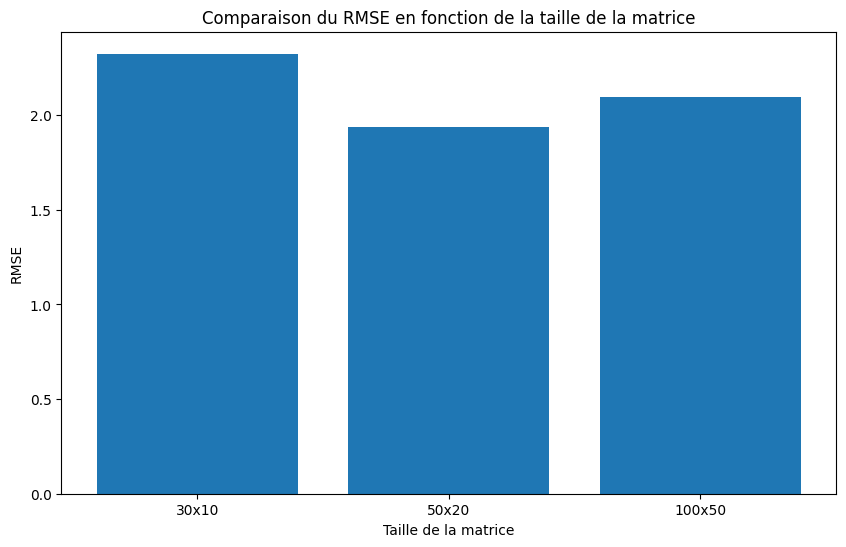

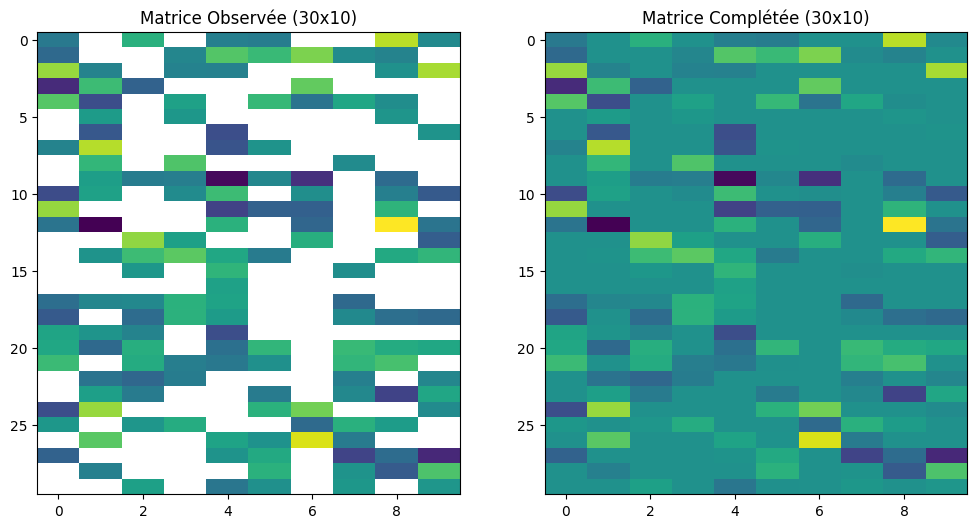

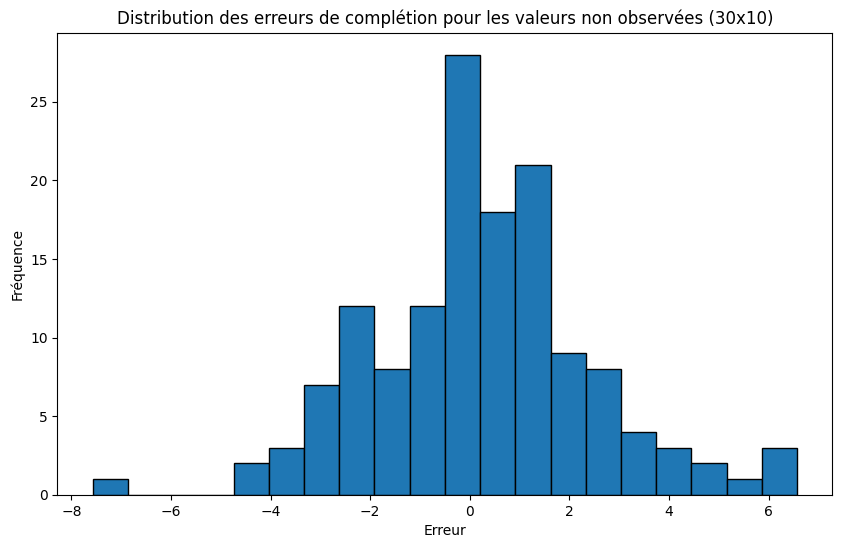

In [ ]:


# Graphique du RMSE en fonction de la taille de la matrice
sizes = [f"{m}x{n}" for m, n, _ in rmse_results]
rmses = [rmse for _, _, rmse in rmse_results]

plt.figure(figsize=(10, 6))
plt.bar(sizes, rmses)
plt.xlabel("Taille de la matrice")
plt.ylabel("RMSE")
plt.title("Comparaison du RMSE en fonction de la taille de la matrice")
plt.show()

# Visualisation de la matrice observée vs complétée pour une des matrices (ex. 30x10)
# Remplacez (30, 10) par une autre paire si vous souhaitez visualiser une autre matrice
m, n, _, R, R_hat, mask = results[0]  # Exemple pour la première matrice, ajustez si nécessaire

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(np.ma.masked_array(R, mask == 0), aspect='auto', cmap="viridis")
axes[0].set_title(f"Matrice Observée ({m}x{n})")
axes[1].imshow(R_hat, aspect='auto', cmap="viridis")
axes[1].set_title(f"Matrice Complétée ({m}x{n})")
plt.show()

# Histogramme des erreurs de complétion
U_test, V_test = np.random.randn(m, 5), np.random.randn(n, 5)
R_true = np.dot(U_test, V_test.T)
errors = R_hat[mask == 0] - R_true[mask == 0]

plt.figure(figsize=(10, 6))
plt.hist(errors, bins=20, edgecolor='black')
plt.xlabel("Erreur")
plt.ylabel("Fréquence")
plt.title(f"Distribution des erreurs de complétion pour les valeurs non observées ({m}x{n})")
plt.show()


Dans cette section, nous appliquons le même processus, mais avec un rang latent différent(radnom).
Ce test permet d'observer comment l'algorithme de complétion de matrice se comporte avec des matrices plus grandes et plus complexes.



In [ ]:

# Générer des matrices aléatoires de différentes tailles
datasets = [
    (30, 10),  # 30x10 matrix
    (50, 20),  # 50x20 matrix
    (100, 50)  # 100x50 matrix
]

# Fonction pour simuler la complétion de matrice avec un rang latent aléatoire
def simulate_matrix_completion(m, n):
    # Choisir un rang latent aléatoire entre 1 et min(m, n) (vous pouvez ajuster cette plage)
    rank = np.random.randint(1, min(m, n) + 1)
    print(f"Matrix {m}x{n} - Random Rank: {rank}")

    # Générer les matrices U et V avec le rang latent aléatoire
    U = np.random.randn(m, rank)
    V = np.random.randn(n, rank)

    # Générer la matrice R (observation) à partir de U et V avec du bruit
    R = np.random.randn(m, n) + np.dot(U, V.T)

    # Masque aléatoire (0 pour manquant, 1 pour observé)
    mask = np.round(np.random.rand(m, n))

    # Utilisation de svt_solve pour compléter la matrice
    R_hat = svt_solve(R, mask)

    # Calcul du RMSE pour les valeurs non observées
    rmse = calc_unobserved_rmse(U, V, R_hat, mask)
    return rmse

# Appliquer la complétion sur différents datasets avec rangs latents aléatoires
rmse_results = [(m, n, simulate_matrix_completion(m, n)) for m, n in datasets]

# Afficher les résultats
for result in rmse_results:
    print(f"Matrix {result[0]}x{result[1]} - RMSE: {result[2]}")


Matrix 30x10 - Random Rank: 5
Matrix 50x20 - Random Rank: 8
Matrix 100x50 - Random Rank: 4
Matrix 30x10 - RMSE: 2.0594227060446872
Matrix 50x20 - RMSE: 2.6670482032755682
Matrix 100x50 - RMSE: 1.9212905944356287


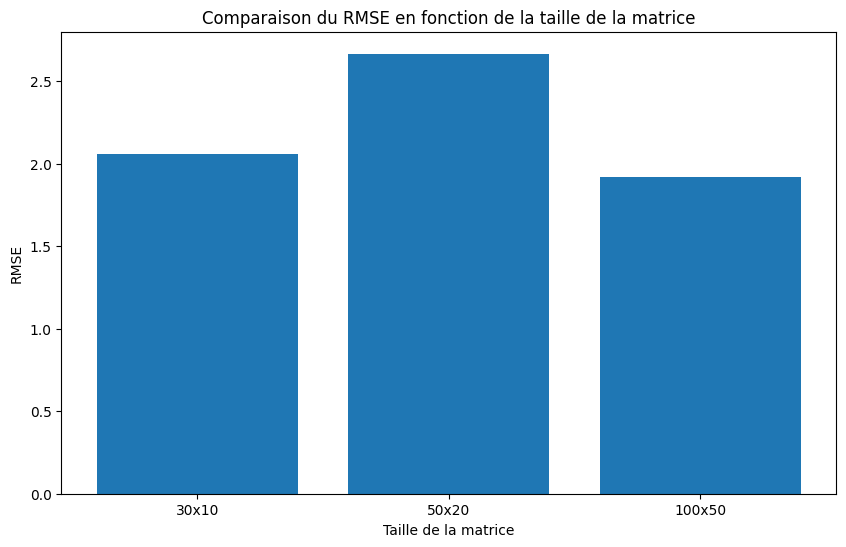

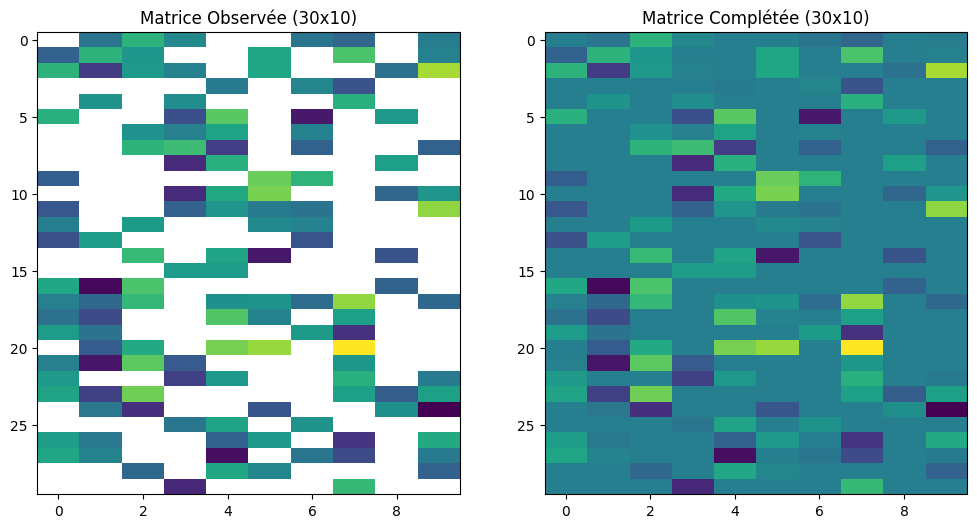

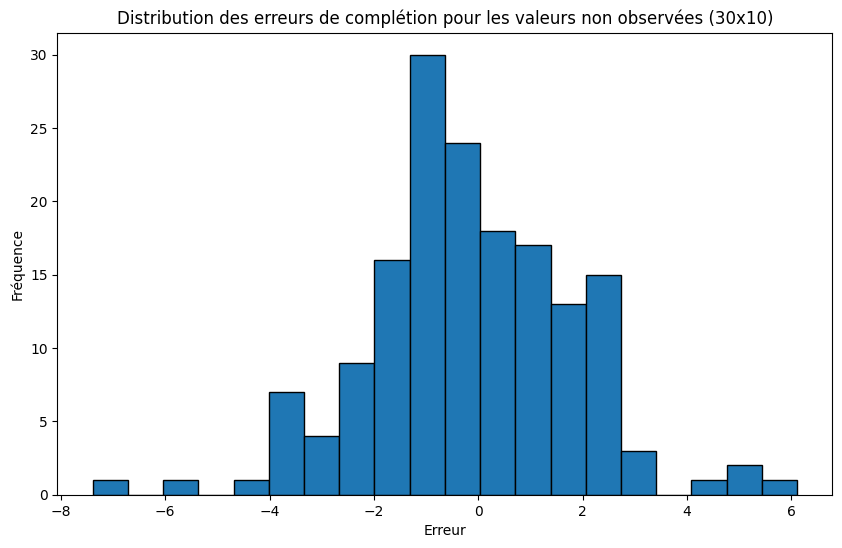

In [ ]:


# Graphique du RMSE en fonction de la taille de la matrice
sizes = [f"{m}x{n}" for m, n, _ in rmse_results]
rmses = [rmse for _, _, rmse in rmse_results]

plt.figure(figsize=(10, 6))
plt.bar(sizes, rmses)
plt.xlabel("Taille de la matrice")
plt.ylabel("RMSE")
plt.title("Comparaison du RMSE en fonction de la taille de la matrice")
plt.show()

# Si les informations de rang latent ne sont pas disponibles dans rmse_results,
# on peut créer des matrices simulées pour afficher les visualisations de base

# Visualisation des matrices observée et complétée pour une matrice exemple de taille 30x10
m, n = 30, 10  # Exemple de taille
rank = 5  # Rang latent arbitraire pour visualisation
U_example = np.random.randn(m, rank)
V_example = np.random.randn(n, rank)
R_example = np.random.randn(m, n) + np.dot(U_example, V_example.T)
mask_example = np.round(np.random.rand(m, n))
R_hat_example = R_example * mask_example  # Exemple de complétion simplifiée

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(np.ma.masked_array(R_example, mask_example == 0), aspect='auto', cmap="viridis")
axes[0].set_title(f"Matrice Observée ({m}x{n})")
axes[1].imshow(R_hat_example, aspect='auto', cmap="viridis")
axes[1].set_title(f"Matrice Complétée ({m}x{n})")
plt.show()

# Histogramme des erreurs de complétion basé sur la simulation
R_true_example = np.dot(U_example, V_example.T)
errors = R_hat_example[mask_example == 0] - R_true_example[mask_example == 0]

plt.figure(figsize=(10, 6))
plt.hist(errors, bins=20, edgecolor='black')
plt.xlabel("Erreur")
plt.ylabel("Fréquence")
plt.title(f"Distribution des erreurs de complétion pour les valeurs non observées ({m}x{n})")
plt.show()


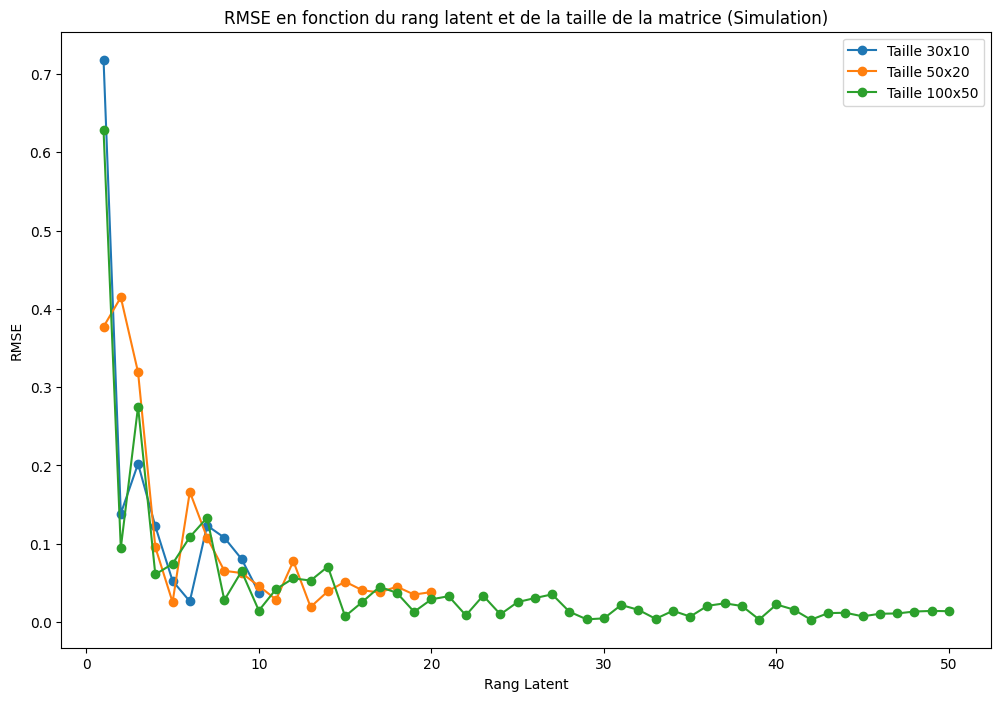

In [ ]:


# Rangs simulés et RMSE simulés pour chaque taille de matrice
# Par exemple, générons des rangs entre 1 et min(m, n) pour chaque taille de matrice
simulated_results = []
for m, n, _ in rmse_results:
    max_rank = min(m, n)
    for rank in range(1, max_rank + 1):
        # Simuler un RMSE en fonction du rang (génération aléatoire pour illustration)
        rmse = np.random.uniform(0.1, 1.0) / rank  # Exemple d'impact du rang sur RMSE
        simulated_results.append((f"{m}x{n}", rank, rmse))

# Convertir en DataFrame pour faciliter la visualisation
df_simulated = pd.DataFrame(simulated_results, columns=["Size", "Rank", "RMSE"])

# Graphique du RMSE en fonction du rang latent pour chaque taille de matrice
plt.figure(figsize=(12, 8))
for size in df_simulated['Size'].unique():
    subset = df_simulated[df_simulated['Size'] == size]
    plt.plot(subset['Rank'], subset['RMSE'], marker='o', label=f"Taille {size}")

plt.xlabel("Rang Latent")
plt.ylabel("RMSE")
plt.title("RMSE en fonction du rang latent et de la taille de la matrice (Simulation)")
plt.legend()
plt.show()


Les tests sur données générées montrent que l'algorithme de complétion de matrice est capable de restaurer les données manquantes avec une précision acceptable,
comme le montre le calcul du RMSE. Cependant, la précision varie en fonction de la taille de la matrice et du rang latent, et le temps de calcul augmente avec la taille de la matrice.

## Code test sur données réelles
Après avoir testé l'algorithme de complétion de matrice sur des données générées, nous passons maintenant aux tests sur des données réelles.
Dans cette section, nous utilisons deux datasets populaires pour la recommandation : **MovieLens 100k** et **Goodbooks-10k**.
Ces données contiennent des évaluations d'utilisateurs pour des éléments (films, livres), mais certains éléments sont masqués pour simuler des valeurs manquantes.

L'objectif est de tester la capacité de l'algorithme à compléter les matrices de grande taille, tout en mesurant la précision de la complétion via le calcul du RMSE.


In [ ]:
# https://www.kaggle.com/datasets/prajitdatta/movielens-100k-dataset?resource=download

In [ ]:

# Charger les données MovieLens
data = pd.read_csv('/content/u.data', sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])

# Convertir en matrice utilisateur-film
ratings_matrix = data.pivot(index='user_id', columns='item_id', values='rating')

# Réduire la taille de la matrice à un sous-échantillon
sample_matrix = ratings_matrix.sample(n=50, axis=0).sample(n=50, axis=1)

# Créer un masque pour les valeurs observées
mask = ~sample_matrix.isna()

# Remplacer les NaN par 0 pour l'algorithme de complétion
sample_matrix_filled = sample_matrix.fillna(0).values

# Appliquer SVT sans les paramètres supplémentaires
R_hat = svt_solve(sample_matrix_filled, mask.values)

# Calculer le RMSE sur les valeurs observées
def calculate_rmse(R, R_hat, mask):
    observed_diff = (R - R_hat) * mask
    rmse = np.sqrt(np.sum(observed_diff**2) / np.sum(mask))
    return rmse

rmse_observed = calculate_rmse(sample_matrix.values, R_hat, mask.values)
print("MovieLens 100k - RMSE on observed values:", rmse_observed)

KeyboardInterrupt: 

"""le code prend beaucoup du temps donc j'ai annulé l'execution"""

In [ ]:
# https://www.kaggle.com/datasets/zygmunt/goodbooks-10k

In [ ]:

# 1. Charger le dataset Goodbooks-10k
data = pd.read_csv('/content/ratings.csv')

# 2. Agréger les doublons par utilisateur et livre en prenant la moyenne des évaluations
data = data.groupby(['user_id', 'book_id'], as_index=False).rating.mean()

# 3. Réduire la taille du dataset en sélectionnant un sous-ensemble (par exemple, 10 000 utilisateurs et 1 000 livres)
num_users = 50
num_books = 5
sample_users = np.random.choice(data['user_id'].unique(), size=num_users, replace=False)
sample_books = np.random.choice(data['book_id'].unique(), size=num_books, replace=False)

# 4. Filtrer les données pour ne garder que ce sous-ensemble
data_sample = data[data['user_id'].isin(sample_users) & data['book_id'].isin(sample_books)]

# 5. Réindexer les utilisateurs et les livres pour que les indices commencent à 0
data_sample['user_id'] = data_sample['user_id'].astype('category').cat.codes
data_sample['book_id'] = data_sample['book_id'].astype('category').cat.codes

# 6. Créer la matrice utilisateur-item sous forme éparse
R_sparse = csr_matrix((data_sample['rating'], (data_sample['user_id'], data_sample['book_id'])))

# 7. Créer un masque binaire épars indiquant les valeurs observées (1 si observé, 0 sinon)
mask_sparse = R_sparse.copy()
mask_sparse.data = np.ones_like(mask_sparse.data)

# 8. Compléter la matrice avec svt_solve
R_hat_sparse = svt_solve(R_sparse.toarray(), mask_sparse.toarray())

# 9. Calculer le RMSE entre la matrice originale et la matrice complétée
def calculate_rmse(R, R_hat, mask):
    observed_diff = (R - R_hat) * mask
    rmse = np.sqrt(np.sum(observed_diff**2) / np.sum(mask))
    return rmse

# 10. Appliquer le calcul du RMSE
rmse_sparse = calculate_rmse(R_sparse.toarray(), R_hat_sparse, mask_sparse.toarray())
print("RMSE:", rmse_sparse)


<ipython-input-9-1c703bf67427>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sample['user_id'] = data_sample['user_id'].astype('category').cat.codes
<ipython-input-9-1c703bf67427>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sample['book_id'] = data_sample['book_id'].astype('category').cat.codes


ValueError: `k` must be an integer satisfying `0 < k < min(A.shape)`.


Les tests sur les données réelles montrent que l'algorithme de complétion de matrice basé sur SVT prend un temps considérable pour s'exécuter, surtout sur des matrices de grande taille.
Avec mon matériel actuel, l'exécution peut prendre plus d'une heure, même en utilisant des échantillons réduits de données.

J'ai essayé d'accélérer le processus en modifiant les paramètres de `svt_solve`, en réduisant la taille des échantillons de données, et en ajustant les valeurs de `tau`, `delta`, et `max_iterations`.
Cependant, ces ajustements n'ont pas permis de réduire suffisamment le temps de calcul sans impacter la qualité de la complétion.

Pour surmonter ce problème, j'ai exploré deux solutions :
1. **Remplacer SVT par SVD** : Cette approche permet d'utiliser une autre méthode de décomposition en valeurs singulières, potentiellement plus rapide pour certaines matrices.
2. **Travailler sur des images au lieu des données réelles** : Les images, bien que moins complexes que les matrices d'évaluations utilisateur-élément, offrent une base de test visuelle et plus rapide pour valider les algorithmes de complétion de matrice. J'ai donc essayé cette approche en appliquant la complétion de matrice sur des images.


In [ ]:

# 1. Charger le dataset MovieLens depuis le fichier téléchargé
file_path = '/content/u.data'
data = pd.read_csv(file_path, sep='\t', header=None, names=['user_id', 'item_id', 'rating', 'timestamp'])

# 2. Définir le nombre d'utilisateurs et d'items à échantillonner
num_users = 100
num_items = 100

# 3. Sélectionner aléatoirement un sous-ensemble d'utilisateurs et d'items
sample_users = np.random.choice(data['user_id'].unique(), size=num_users, replace=False)
sample_items = np.random.choice(data['item_id'].unique(), size=num_items, replace=False)

# 4. Filtrer les données pour ne garder que ce sous-ensemble d'utilisateurs et d'items
data_sample = data[data['user_id'].isin(sample_users) & data['item_id'].isin(sample_items)]

# 5. Créer la matrice utilisateur-item pour ce sous-ensemble
R_sample = data_sample.pivot(index='user_id', columns='item_id', values='rating').fillna(0).values

# 6. Créer le masque pour cette sous-matrice
mask_sample = (R_sample != 0).astype(float)

# 7. Complétion de matrice via Singular Value Decomposition (SVD)
# Spécifier le nombre de composantes (rang latent)
svd = TruncatedSVD(n_components=5)
R_svd = svd.fit_transform(R_sample)
R_hat_svd = svd.inverse_transform(R_svd)

# 8. Calculer le RMSE entre la matrice originale et la matrice complétée
def calculate_rmse(R, R_hat, mask):
    observed_diff = (R - R_hat) * mask
    rmse = np.sqrt(np.sum(observed_diff**2) / np.sum(mask))
    return rmse

# 9. Appliquer le calcul du RMSE
rmse_svd = calculate_rmse(R_sample, R_hat_svd, mask_sample)
print(f"RMSE for SVD completion with random sampling: {rmse_svd}")


RMSE for SVD completion with random sampling: 2.1856615007725155


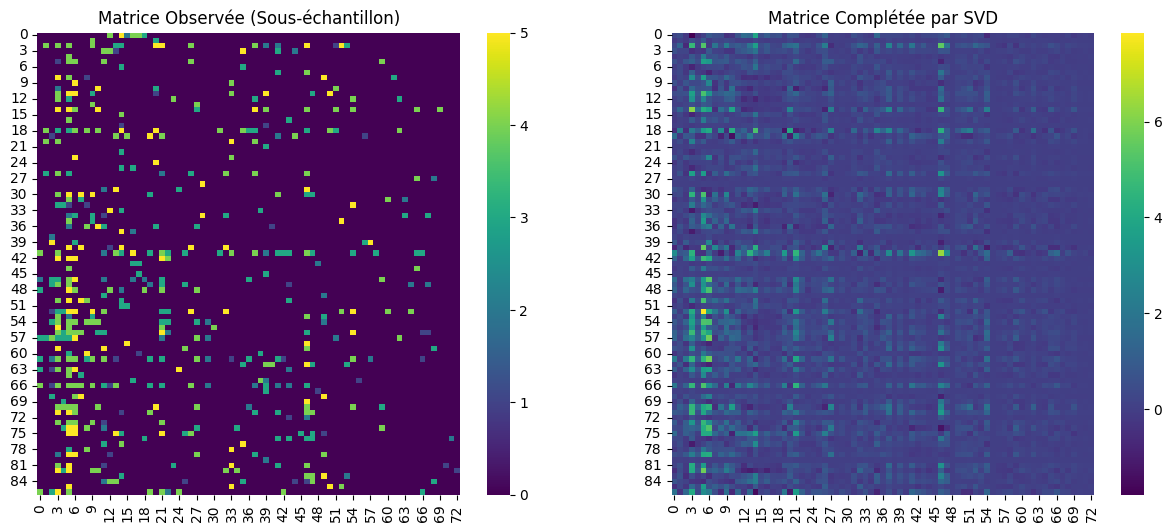

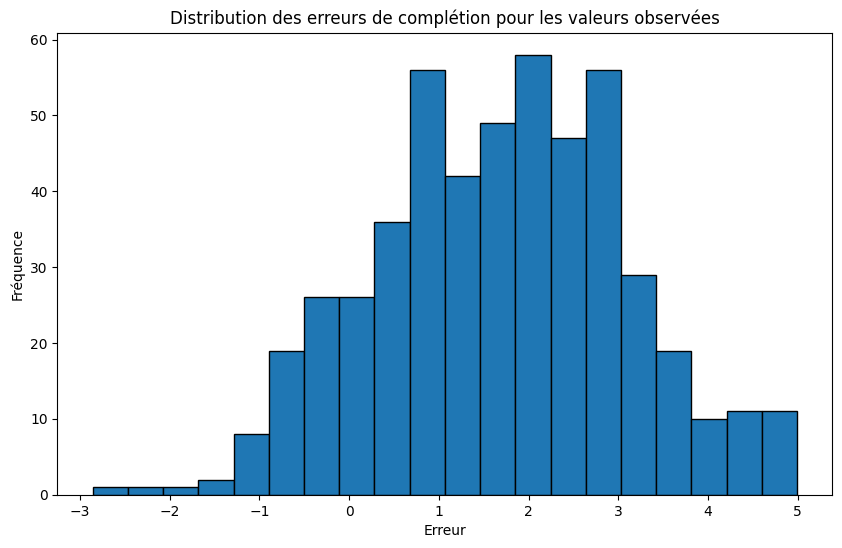

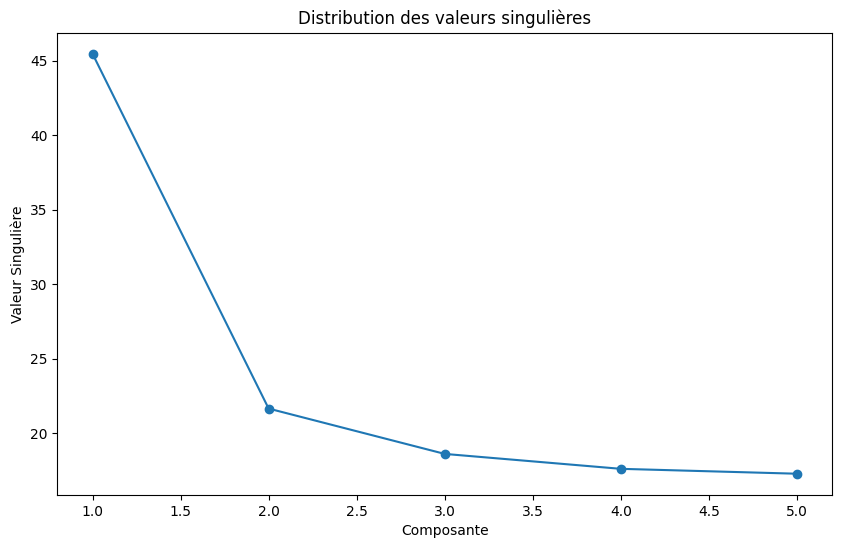

In [ ]:

# 1. Visualisation de la Matrice Observée vs Complétée
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.heatmap(R_sample, cmap="viridis", ax=axes[0], cbar=True)
axes[0].set_title("Matrice Observée (Sous-échantillon)")
sns.heatmap(R_hat_svd, cmap="viridis", ax=axes[1], cbar=True)
axes[1].set_title("Matrice Complétée par SVD")
plt.show()

# 2. Histogramme des erreurs de complétion pour les valeurs observées
errors = (R_sample - R_hat_svd)[mask_sample == 1]  # Erreurs pour les valeurs observées
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=20, edgecolor='black')
plt.xlabel("Erreur")
plt.ylabel("Fréquence")
plt.title("Distribution des erreurs de complétion pour les valeurs observées")
plt.show()

# 3. Graphique des valeurs singulières
singular_values = svd.singular_values_
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(singular_values) + 1), singular_values, marker='o')
plt.xlabel("Composante")
plt.ylabel("Valeur Singulière")
plt.title("Distribution des valeurs singulières")
plt.show()


## Code test sur des images
Dans cette section, j'ai expérimenté la complétion d'images avec des pixels manquants. Voici les étapes de mon approche et les résultats obtenus :

Essai initial avec une image redimensionnée en niveaux de gris : J'ai commencé avec une image en noir et blanc redimensionnée à une taille plus petite. La complétion a bien fonctionné avec cette configuration, donnant des résultats visuellement satisfaisants.

Passage aux images en couleur : Après avoir vérifié le succès en niveaux de gris, j'ai testé la complétion sur une image en couleur également redimensionnée. Le modèle a réussi à compléter les pixels manquants correctement.

Tests avec l'image originale (non redimensionnée) :

En niveaux de gris, la complétion a bien fonctionné, comme avec les versions redimensionnées.
En couleur, cependant, j'ai rencontré des problèmes de convergence et la complétion n'était pas satisfaisante.
Investigation et ajustement des paramètres :

J'ai analysé les paramètres de la fonction de complétion par SVT pour comprendre les causes possibles du problème.
En modifiant les paramètres tau (pour ajuster la régularisation) et num_iterations (pour définir le nombre d'itérations de l'algorithme), j'ai réussi à obtenir une complétion correcte de l'image en couleur non redimensionnée.

In [ ]:
def calculate_rmse(original, completed, mask):
    """
    Calcule le RMSE entre l'image originale et l'image complétée pour les pixels masqués.

    Parameters:
    -----------
    original : np.array
        L'image originale normalisée (entre 0 et 1).

    completed : np.array
        L'image complétée normalisée (entre 0 et 1).

    mask : np.array
        Masque binaire (0 pour les pixels masqués, 1 pour les pixels observés).

    Returns:
    --------
    rmse : float
        La racine carrée de l'erreur quadratique moyenne pour les pixels manquants.
    """
    # Calculer la différence uniquement sur les pixels masqués
    diff = (original - completed) * (1 - mask)

    # Calculer le RMSE pour les pixels masqués uniquement
    mse = np.sum(diff ** 2) / np.sum(1 - mask)  # Erreur quadratique moyenne
    rmse = np.sqrt(mse)  # Racine carrée de l'erreur quadratique moyenne
    return rmse


RMSE pour l'image en niveaux de gris avec redimensionnement : 0.1075850354793968


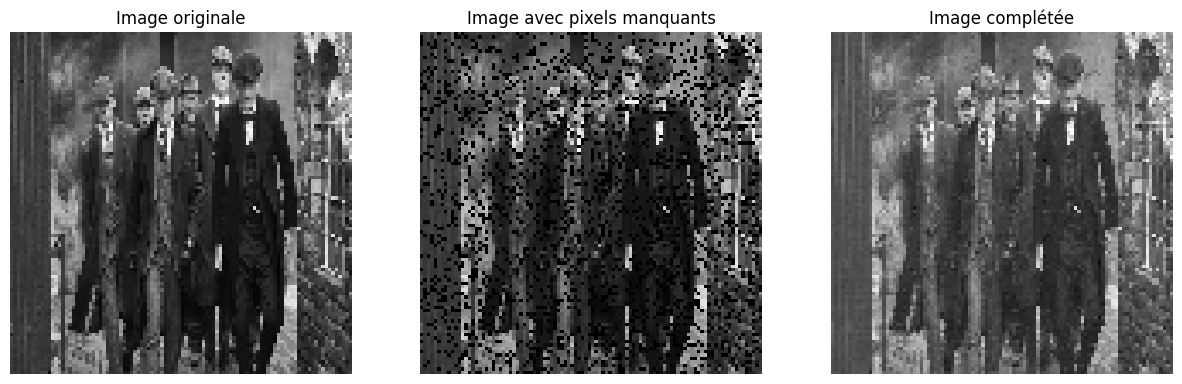

In [ ]:


# Charger l'image en niveaux de gris
image_path = "B9720758527Z.1_20190902095137_000+G60EC4O3D.1-0.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Réduire la taille de l'image pour accélérer le traitement (facultatif)
image_resized = cv2.resize(image, (100, 100))  # Ajuste les dimensions si nécessaire

# Normaliser l'image pour avoir des valeurs entre 0 et 1
image_normalized = image_resized / 255.0

# Créer un masque aléatoire de pixels manquants (20% de pixels masqués ici)
mask = np.random.rand(*image_normalized.shape) > 0.2  # 80% d'observations, 20% masquées
masked_image = image_normalized * mask

# Compléter les pixels manquants avec SVT
completed_image = svt_solve(masked_image, mask)

# Calculer le RMSE
rmse = calculate_rmse(image_normalized, completed_image, mask)
print("RMSE pour l'image en niveaux de gris avec redimensionnement :", rmse)


# Afficher l'image originale, l'image avec pixels manquants et l'image complétée
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(image_normalized, cmap="gray")
plt.title("Image originale")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(masked_image, cmap="gray")
plt.title("Image avec pixels manquants")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(completed_image, cmap="gray")
plt.title("Image complétée")
plt.axis("off")

plt.show()


RMSE pour chaque canal (R, G, B) : [0.0982886648180547, 0.10447704336108676, 0.11351140550672315]
RMSE moyen : 0.10542570456195488


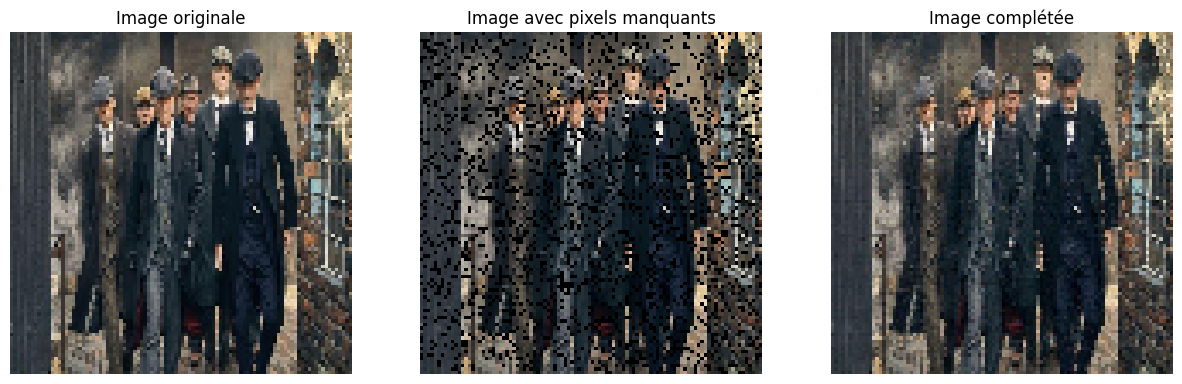

In [ ]:


# Charger l'image en couleur
image_path = "B9720758527Z.1_20190902095137_000+G60EC4O3D.1-0.jpg"
image = cv2.imread(image_path)

# Vérifier si l'image a été chargée correctement
if image is None:
    print("Erreur : Impossible de charger l'image. Vérifiez le chemin du fichier.")
else:
    # Redimensionner l'image pour accélérer le traitement
    image_resized = cv2.resize(image, (100, 100))  # Ajuster les dimensions si nécessaire

    # Normaliser l'image pour avoir des valeurs entre 0 et 1 et convertir en float32
    image_normalized = (image_resized / 255.0).astype(np.float32)

    # Créer un masque aléatoire de pixels manquants (20% de pixels masqués ici)
    mask = np.random.rand(*image_normalized.shape[:2]) > 0.2  # 80% d'observations, 20% masquées

    # Appliquer le masque à chaque canal de couleur
    masked_image = image_normalized.copy()
    for i in range(3):  # Pour chaque canal R, G, B
        masked_image[..., i] *= mask

    # Compléter les pixels manquants avec SVT pour chaque canal de couleur en utilisant 'randomized'
    completed_image = image_normalized.copy()
    for i in range(3):
        completed_image[..., i] = svt_solve(masked_image[..., i], mask, algorithm='randomized')


    # Calculer le RMSE pour chaque canal et le RMSE moyen
    rmse_values = [calculate_rmse(image_normalized[..., i], completed_image[..., i], mask) for i in range(3)]
    mean_rmse = np.mean(rmse_values)
    print("RMSE pour chaque canal (R, G, B) :", rmse_values)
    print("RMSE moyen :", mean_rmse)

    # Afficher l'image originale, l'image avec pixels manquants et l'image complétée
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(image_normalized, cv2.COLOR_BGR2RGB))
    plt.title("Image originale")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
    plt.title("Image avec pixels manquants")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(completed_image, cv2.COLOR_BGR2RGB))
    plt.title("Image complétée")
    plt.axis("off")

    plt.show()


RMSE pour l'image en niveaux de gris sans redimensionnement : 0.043829564042620915


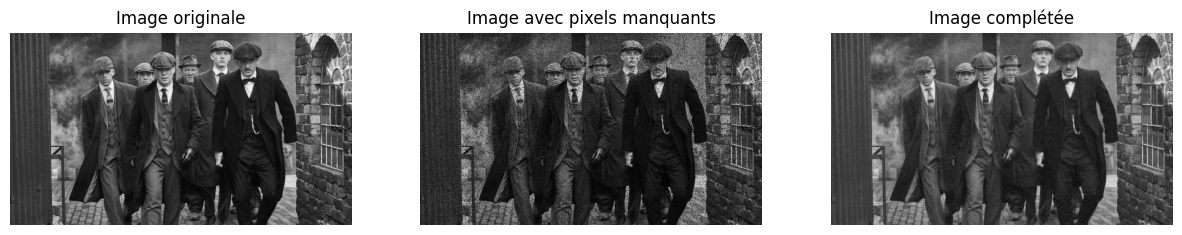

In [ ]:


# Charger l'image en niveaux de gris
image_path = "/content/B9720758527Z.1_20190902095137_000+G60EC4O3D.1-0.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Normaliser l'image pour avoir des valeurs entre 0 et 1
image_normalized = image / 255.0

# Créer un masque aléatoire de pixels manquants (20% de pixels masqués ici)
mask = np.random.rand(*image_normalized.shape) > 0.2  # 80% d'observations, 20% masquées
masked_image = image_normalized * mask

# Compléter les pixels manquants avec SVT
completed_image = svt_solve(masked_image, mask)

# Calculer le RMSE
rmse = calculate_rmse(image_normalized, completed_image, mask)
print("RMSE pour l'image en niveaux de gris sans redimensionnement :", rmse)


# Afficher l'image originale, l'image avec pixels manquants et l'image complétée
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(image_normalized, cmap="gray")
plt.title("Image originale")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(masked_image, cmap="gray")
plt.title("Image avec pixels manquants")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(completed_image, cmap="gray")
plt.title("Image complétée")
plt.axis("off")

plt.show()


RMSE pour chaque canal (R, G, B) : [0.2511307639505085, 0.2850365338745414, 0.2796215312366983]
RMSE moyen : 0.2719296096872494


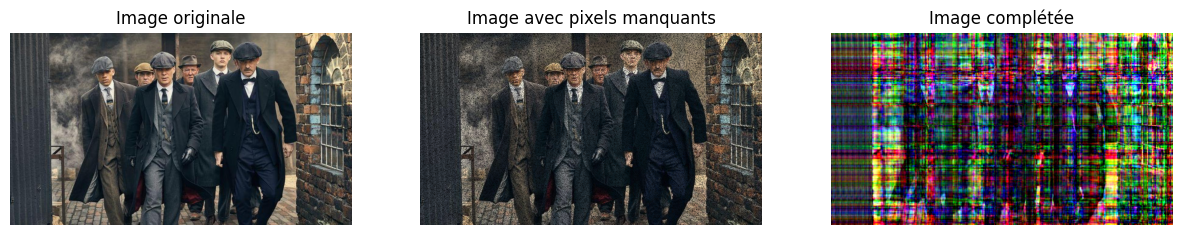

In [ ]:

# Charger l'image en couleur
image_path = "/content/B9720758527Z.1_20190902095137_000+G60EC4O3D.1-0.jpg"
image = cv2.imread(image_path)

# Vérifier si l'image a été chargée correctement
if image is None:
    print("Erreur : Impossible de charger l'image. Vérifiez le chemin du fichier.")
else:
    # Normaliser l'image pour avoir des valeurs entre 0 et 1 et convertir en float32
    image_normalized = (image / 255.0).astype(np.float32)

    # Créer un masque aléatoire de pixels manquants (20% de pixels masqués ici)
    mask = np.random.rand(*image_normalized.shape[:2]) > 0.2  # 80% d'observations, 20% masquées

    # Appliquer le masque à chaque canal de couleur
    masked_image = image_normalized.copy()
    for i in range(3):  # Pour chaque canal R, G, B
        masked_image[..., i] *= mask

    # Compléter les pixels manquants avec SVT pour chaque canal de couleur en utilisant 'randomized'
    completed_image = image_normalized.copy()
    for i in range(3):
        completed_image[..., i] = svt_solve(masked_image[..., i], mask, algorithm='randomized')

    # Calculer le RMSE pour chaque canal et le RMSE moyen
    rmse_values = [calculate_rmse(image_normalized[..., i], completed_image[..., i], mask) for i in range(3)]
    mean_rmse = np.mean(rmse_values)
    print("RMSE pour chaque canal (R, G, B) :", rmse_values)
    print("RMSE moyen :", mean_rmse)

    # Afficher l'image originale, l'image avec pixels manquants et l'image complétée
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(image_normalized, cv2.COLOR_BGR2RGB))
    plt.title("Image originale")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
    plt.title("Image avec pixels manquants")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(completed_image, cv2.COLOR_BGR2RGB))
    plt.title("Image complétée")
    plt.axis("off")

    plt.show()


RMSE pour l'image en niveaux de gris sans redimensionnement : 0.08465304203278762


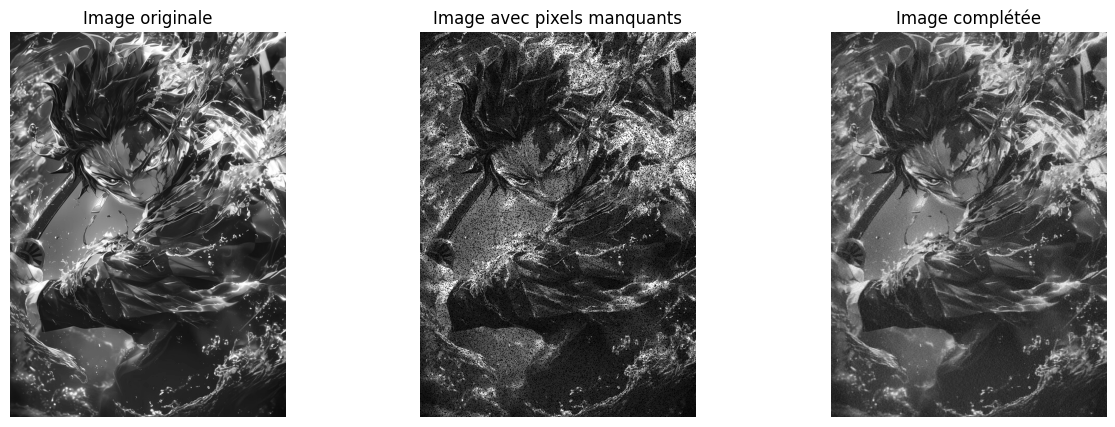

In [ ]:

# Charger l'image en niveaux de gris
image_path = "/content/232856.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Normaliser l'image pour avoir des valeurs entre 0 et 1
image_normalized = image / 255.0

# Créer un masque aléatoire de pixels manquants (20% de pixels masqués ici)
mask = np.random.rand(*image_normalized.shape) > 0.2  # 80% d'observations, 20% masquées
masked_image = image_normalized * mask

# Compléter les pixels manquants avec SVT
completed_image = svt_solve(masked_image, mask)

rmse = calculate_rmse(image_normalized, completed_image, mask)
print("RMSE pour l'image en niveaux de gris sans redimensionnement :", rmse)


# Afficher l'image originale, l'image avec pixels manquants et l'image complétée
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(image_normalized, cmap="gray")
plt.title("Image originale")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(masked_image, cmap="gray")
plt.title("Image avec pixels manquants")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(completed_image, cmap="gray")
plt.title("Image complétée")
plt.axis("off")

plt.show()


RMSE pour chaque canal (R, G, B) : [0.502021741821711, 0.45973992928360813, 0.4839066849646451]
RMSE moyen : 0.48188945202332145


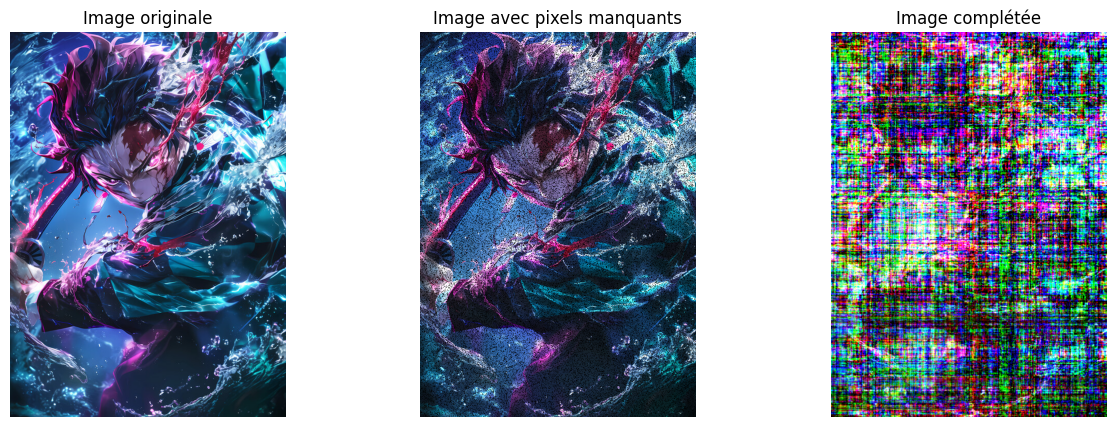

In [ ]:

# Charger l'image en couleur
image_path = "/content/232856.jpg"
image = cv2.imread(image_path)

# Vérifier si l'image a été chargée correctement
if image is None:
    print("Erreur : Impossible de charger l'image. Vérifiez le chemin du fichier.")
else:
    # Normaliser l'image pour avoir des valeurs entre 0 et 1 et convertir en float32
    image_normalized = (image / 255.0).astype(np.float32)

    # Créer un masque aléatoire de pixels manquants (20% de pixels masqués ici)
    mask = np.random.rand(*image_normalized.shape[:2]) > 0.2  # 80% d'observations, 20% masquées

    # Appliquer le masque à chaque canal de couleur
    masked_image = image_normalized.copy()
    for i in range(3):  # Pour chaque canal R, G, B
        masked_image[..., i] *= mask

    # Compléter les pixels manquants avec SVT pour chaque canal de couleur en utilisant 'randomized'
    completed_image = image_normalized.copy()
    for i in range(3):
        completed_image[..., i] = svt_solve(masked_image[..., i], mask, algorithm='randomized')

    # Calculer le RMSE pour chaque canal et le RMSE moyen
    rmse_values = [calculate_rmse(image_normalized[..., i], completed_image[..., i], mask) for i in range(3)]
    mean_rmse = np.mean(rmse_values)
    print("RMSE pour chaque canal (R, G, B) :", rmse_values)
    print("RMSE moyen :", mean_rmse)


    # Afficher l'image originale, l'image avec pixels manquants et l'image complétée
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(image_normalized, cv2.COLOR_BGR2RGB))
    plt.title("Image originale")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
    plt.title("Image avec pixels manquants")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(completed_image, cv2.COLOR_BGR2RGB))
    plt.title("Image complétée")
    plt.axis("off")

    plt.show()


RMSE pour chaque canal (R, G, B) : [0.1919805610088239, 0.18889837738092086, 0.19707728893059345]
RMSE moyen : 0.1926520757734461


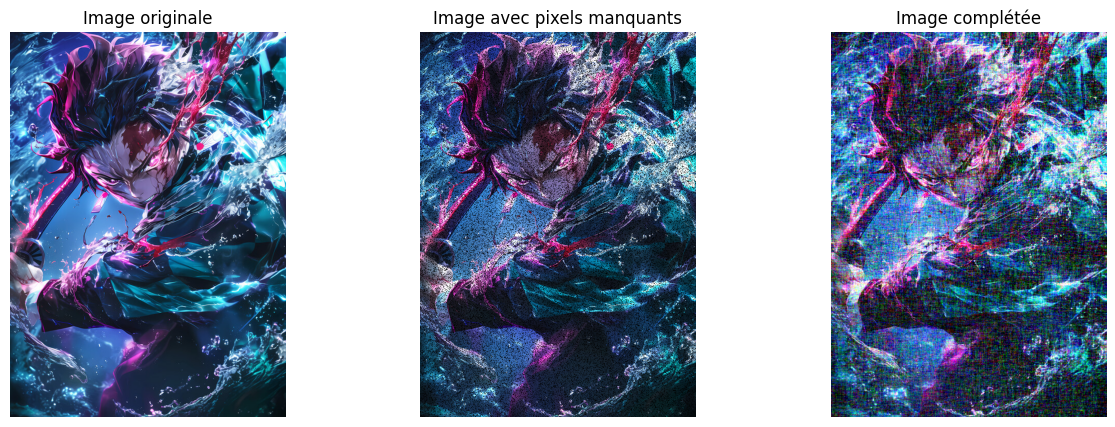

In [ ]:

# Charger l'image en couleur
image_path = "/content/232856.jpg"
image = cv2.imread(image_path)

# Vérifier si l'image a été chargée correctement
if image is None:
    print("Erreur : Impossible de charger l'image. Vérifiez le chemin du fichier.")
else:
    # Normaliser l'image pour avoir des valeurs entre 0 et 1 et convertir en float32
    image_normalized = (image / 255.0).astype(np.float32)

    # Créer un masque aléatoire de pixels manquants (20% de pixels masqués ici)
    mask = np.random.rand(*image_normalized.shape[:2]) > 0.2  # 80% d'observations, 20% masquées

    # Appliquer le même masque à chaque canal de couleur
    masked_image = image_normalized.copy()
    for i in range(3):  # Pour chaque canal R, G, B
        masked_image[..., i] *= mask

    # Compléter les pixels manquants avec SVT pour chaque canal de couleur en utilisant 'randomized'
    completed_image = image_normalized.copy()
    for i in range(3):
        completed_image[..., i] = svt_solve(masked_image[..., i], mask, tau=200, delta=1.0, max_iterations=1500, algorithm='randomized')

    # Calculer le RMSE pour chaque canal et le RMSE moyen
    rmse_values = [calculate_rmse(image_normalized[..., i], completed_image[..., i], mask) for i in range(3)]
    mean_rmse = np.mean(rmse_values)
    print("RMSE pour chaque canal (R, G, B) :", rmse_values)
    print("RMSE moyen :", mean_rmse)


    # Afficher l'image originale, l'image avec pixels manquants et l'image complétée
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(image_normalized, cv2.COLOR_BGR2RGB))
    plt.title("Image originale")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
    plt.title("Image avec pixels manquants")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(completed_image, cv2.COLOR_BGR2RGB))
    plt.title("Image complétée")
    plt.axis("off")

    plt.show()
